In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Matplotlib is building the font cache; this may take a moment.


In [2]:
home_path=open('/home/ec2-user/SageMaker/mariano/repositories/train-test-split/two-phase-scal-ng20-train-test/config/repository_path.txt').read()
input_file = os.path.join(home_path,'results/two_phase_scal_sim_results.csv')
df =pd.read_csv(input_file)
print(df.shape)
df.head()

(2800, 32)


,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,...,threshold,Accuracy (test),Precision (test),Recall (test),F1-Score (test),TP (test),FP (test),TN (test),FN (test),Total effort
0,2023-04-13 09:37,7513,logreg,relevance,20newsgroup,753,1,29,0.041578,0.041578,...,0.047511,0.044344,0.044344,1.0,0.084922,167,3599,0,0,29
1,2023-04-13 09:37,7513,logreg,relevance,20newsgroup,753,1,29,0.041325,0.041325,...,0.071639,0.044344,0.044344,1.0,0.084922,167,3599,0,0,58
2,2023-04-13 09:37,7513,logreg,relevance,20newsgroup,753,3,84,0.041829,0.041829,...,0.079524,0.044344,0.044344,1.0,0.084922,167,3599,0,0,84
3,2023-04-13 09:37,7513,logreg,relevance,20newsgroup,753,2,57,0.041875,0.041875,...,0.078606,0.044344,0.044344,1.0,0.084922,167,3599,0,0,57
4,2023-04-13 09:37,23052,logreg,relevance,20newsgroup,753,1,29,0.051490,0.051490,...,0.057280,0.050717,0.050717,1.0,0.096538,191,3575,0,0,29


<AxesSubplot:xlabel='Total effort', ylabel='F1-Score (test)'>

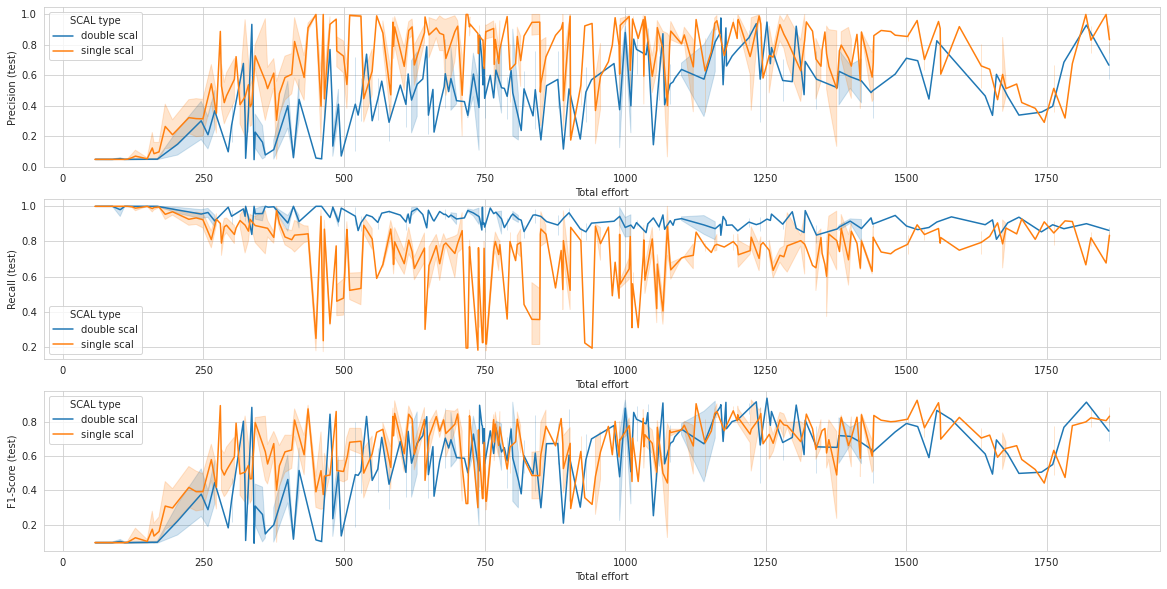

In [3]:
sns.set_style('whitegrid')
# fig, ax = plt.subplots(3,figsize=(20,10))


# x_axis_var='Total effort'
# df = pd.read_csv(input_file)

# # PLOT DOUBLE SCAL
# print(f'df.shape={df.shape}')
# double_scal_df = df[df['SCAL type']=='double scal']
# double_scal_df = double_scal_df[double_scal_df['SCAL-round-no']==2]
# print(f'double_scal_df.shape={double_scal_df.shape}')
# print(double_scal_df.shape)
# double_scal_df = double_scal_df.sort_values(by=x_axis_var)

# x = sorted(list(set(double_scal_df[x_axis_var])))

# f1score=[]
# recall=[]
# precision=[]
# for xi in x:
#     auxdf=double_scal_df[double_scal_df[x_axis_var]==xi]
#     f1score.append(np.average(auxdf['F1-Score (corrected)']))
#     precision.append(np.average(auxdf['Precision (corrected)']))
#     recall.append(np.average(auxdf['Recall (corrected)']))
# ax[0].plot(x,precision, marker='x', label='double round scal')
# ax[1].plot(x,recall, marker='x', label='double round scal')
# ax[2].plot(x,f1score, marker='x', label='double round scal')

    
# # PLOT SINGLE SCAL
# single_scal_df = df[df['SCAL type']=='single scal']
# print(f'single_scal_df.shape={single_scal_df.shape}')
# print(single_scal_df.shape)

# single_scal_df = single_scal_df.sort_values(by=x_axis_var)
# x = sorted(list(set(single_scal_df[x_axis_var])))
# f1score=[]
# recall=[]
# precision=[]
# for xi in x:
#     auxdf=single_scal_df[single_scal_df[x_axis_var]==xi]
#     f1score.append(np.average(auxdf['F1-Score']))
#     precision.append(np.average(auxdf['Precision']))
#     recall.append(np.average(auxdf['Recall']))
# ax[0].plot(x,precision, marker='x', label='single round scal')
# ax[1].plot(x,recall, marker='x', label='single round scal')
# ax[2].plot(x,f1score, marker='x', label='single round scal')



# # MISC
# ax[2].legend()

# ax[0].set_ylabel('Precision')
# ax[1].set_ylabel('Recall')
# ax[2].set_ylabel('F1-Score')
# for ax_i in ax:
#     ax_i.set_xlabel(x_axis_var)
    
# if x_axis_var=='Total effort':
#     for ax_i in ax:        
#         y1, y2 = ax_i.get_ylim()
#         ax_i.plot([1308, 1308], [y1,y2], ls='--')
#         ax_i.set_ylim(y1,y2)

# pd.DataFrame({'type':['single round scal', 'double round scal'], 
#               'Avg. Precision': [np.average(single_scal_df['Precision']), np.average(double_scal_df['Precision (corrected)'])],
#               'Avg. Recall': [np.average(single_scal_df['Recall']), np.average(double_scal_df['Recall (corrected)'])],
#               'Avg. F1-Score': [np.average(single_scal_df['F1-Score']), np.average(double_scal_df['F1-Score (corrected)'])],
#              })
fig,ax=plt.subplots(3,figsize=(20,10))
df =pd.read_csv(input_file)


df=df[((df['SCAL type']=='double scal') & (df['SCAL-round-no']==2)) | ((df['SCAL type']=='single scal')) ]


# for row_ix in range(df.shape[0]):
#     row = df.iloc[row_ix,:]
#     if row['SCAL type']=='double scal' and row['SCAL-round-no']==2:
# #         print('entro')
#         df.iloc[row_ix,df.columns.get_loc('F1-Score')]=df.iloc[row_ix,df.columns.get_loc('F1-Score (corrected)')]
#         df.iloc[row_ix,df.columns.get_loc('Precision')]=df.iloc[row_ix,df.columns.get_loc('Precision (corrected)')]
#         df.iloc[row_ix,df.columns.get_loc('Recall')]=df.iloc[row_ix,df.columns.get_loc('Recall (corrected)')]
    
    
# x_name='N'
x_name='Total effort'
sns.lineplot(x=x_name, y="Precision (test)",
             hue="SCAL type",
             data=df,ax=ax[0])
sns.lineplot(x=x_name, y="Recall (test)",
             hue="SCAL type",
             data=df,ax=ax[1])
sns.lineplot(x=x_name, y="F1-Score (test)",
             hue="SCAL type",
             data=df,ax=ax[2])

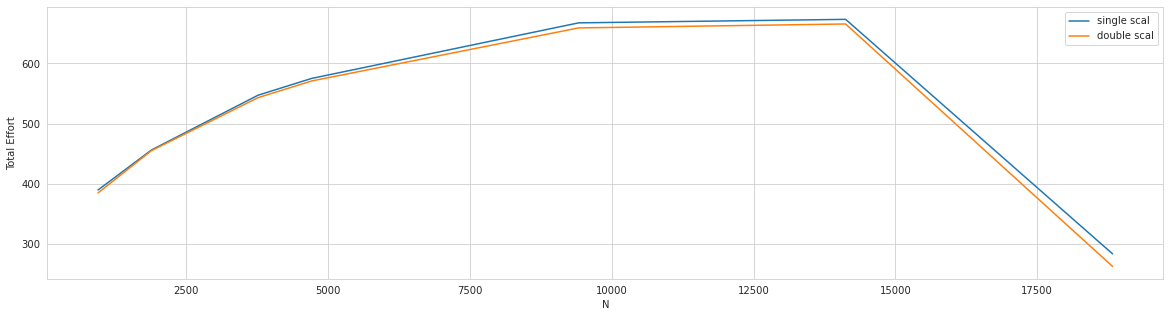

In [100]:
fig,ax=plt.subplots(1,figsize=(20,5))
df = pd.read_csv(input_file)

df=df[((df['SCAL type']=='double scal') & (df['SCAL-round-no']==2)) | ((df['SCAL type']=='single scal')) ]

Ns = sorted(list(set(df['N'])))
x=Ns
single_scal_effort=[]
double_scal_effort=[]
for Ni in Ns:
    auxdf=df[df['N']==Ni]
    single_scal_effort.append(np.average(auxdf[auxdf['SCAL type']=='single scal']['Total effort']))
    double_scal_effort.append(np.average(auxdf[auxdf['SCAL type']=='double scal']['Total effort']))
    
ax.plot(x,single_scal_effort, label='single scal')
ax.plot(x,double_scal_effort, label='double scal')
ax.set_ylabel('Total Effort')
ax.set_xlabel('N')
ax.legend()

In [45]:
from scipy.stats import t
def confidence_interval(data):
    m = np.average(data)
    s = np.std(data)
    dof = len(x)-1 
    confidence = 0.95
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 
    
confidence_interval(single_scal_df['F1-Score'])

(0.11023385352535914, 0.8223558534830593)